In [105]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from graphviz import Source,render

In [106]:
def construct(data,question,parent,user):
    if parent == ['root']:
        root =  data['quests'][0]["dataquestionnaire"]
    else : 
        root = data
    if user == '':
        try : 
            user = data['logs'][0]['IDuser']

        except :
            if "unknow" not in question :
                user = "unknow"
            else :
                user = 'unknow'
                i = 0
                while user in question :
                    i+=1
                    user = 'unknow{}'.format(i) 
        question[user] = {}


    for element in root:
        typeQ = element['answerType']

        if typeQ not in question[user] :
            question[user][typeQ] = {}

        question[user][typeQ][element['code']] = {}

        if typeQ == "Range":
            if 'sousquest' in element['options'] :
                question[user][typeQ][element['code']] = {
                    'value' : element['value'],
                    'subtitle':element['subtitle'],
                    'subquestions':{},
                    'answered':element['answered'],
                    'root' : parent}  

                parent.append(element['code'])
                for subquestion in element['options']['sousquest'] :
                    construct([subquestion],question,parent,user)

            else :
                question[user][typeQ][element['code']] = {
                    'value' : element['value'],
                    'min-max' : [element['options']['min'] ,element['options']['max']],
                    'root':parent}
            parent = ['root']
            


        if typeQ == "Radio" :
            parent.append(element['code'])
            for subquestion in element['questionOptions'] :
                question[user][typeQ][element['code']][subquestion['text']] = { 
                    "checked": subquestion['checked'] ,
                    "value": subquestion['value'],
                    "root": parent}
            parent = ['root']


        if typeQ == 'Checkbox' :
            parent.append(element['code'])
            for subquestion in element['questionOptions'] :
                question[user][typeQ][element['code']][subquestion['text']] = { 
                    "checked": subquestion['checked'] ,
                    "value": subquestion['value'],
                    "root": parent}
            parent = ['root']
      
        if typeQ == 'Text' :
            question[user][typeQ][element['code']] = {
                'value' : element["value"],
                'root' : parent
                }
            parent = ['root']

        if typeQ == 'YesNo':
            if 'sousquest' in element['options'] :
                question[user][typeQ][element['code']] = {
                    'value' : element['checked'],
                    'subquestion_name' : {element['options']['sousquest'][0]['code']},
                    'subquestions':{},
                    'subtitle' :element['options']['sousquest'][0]['subtitle'],
                    'root' : parent }
                
                parent.append(element['code'])
                for subquestion in element['options']['sousquest'] :
                    construct([subquestion],question,parent,user)

            else :
                question[user][typeQ][element['code']] = {
                    'value' : element['checked'],
                    'root' : parent }
            parent = ['root']


        if typeQ == 'Contact':
            question[user][typeQ][element['code']] = {
                'subtitle' : element['subtitle'],
                'value' : element['value'],
                'root' : parent }
            parent = ['root']

                
        if typeQ == 'Time':
            question[user][typeQ][element['code']] = {
                'subtitle' : element['subtitle'],
                'value' : element['value'],
                'root' : parent }
            parent = ['root']

        if typeQ == 'Input':
            question[user][typeQ][element['code']] = {
                'subtitle' : element['subtitle'],
                'value' : element['value'],
                'root' : parent }
            parent = ['root']


        if typeQ == 'Section':
            if 'sousquest' in element['options'] :
                question[user][typeQ][element['code']] = {
                    'subtitle' :element['subtitle'],
                    'root' : parent }

                parent.append(element['code'])
                for subquestion in element['options']['sousquest'] :
                    construct([subquestion],question,parent,user)
            parent = ['root']

    return question


In [107]:
    def import_json(source):
    files = os.listdir(source)
    question = {}
    for file in files :
        with open("json/{}".format(file), 'r',encoding='utf8') as f:
            datastore = json.load(f)
            if "quests" in datastore :
                    if datastore["quests"] != []:
                        question = construct(datastore,question,['root'],'')
    return question

"with open('reconstruct-json.json', 'w') as outfile:\n    json.dump(question, outfile)"

text
YesNo
Contact
Range
Checkbox
Radio

In [109]:
def fetch_user(querry):
    Range_personne = {}
    for key in question.keys():
        if querry in question[key] : 
            for el in question[key][querry]:
                if el not in Range_personne :
                    Range_personne[el] = 0

                Range_personne[el]+=1 
    return Range_personne

answ_number = fetch_user('Range')

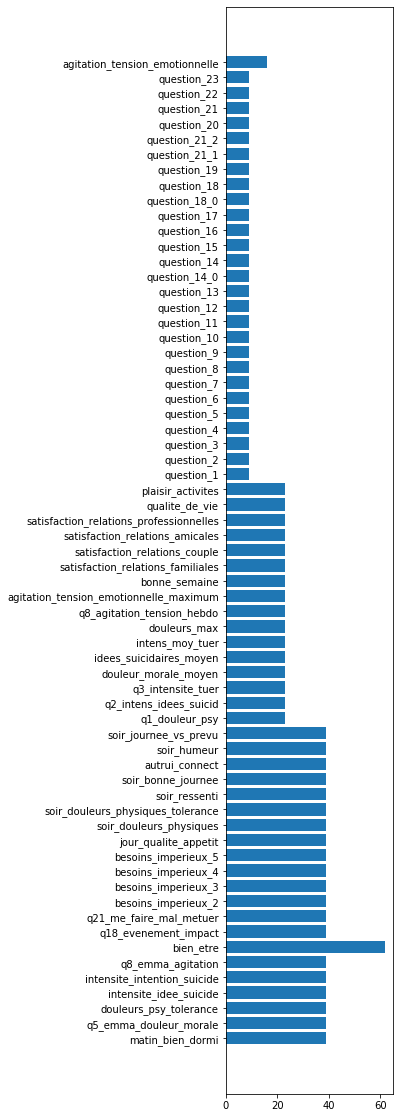

In [110]:
plt.figure(figsize=(3, 20)) 
plt.barh(*zip(*answ_number.items()))
plt.show()

In [111]:
question.keys()

dict_keys(['bcc08', 'bcm03', 'bda04', 'bmf02', 'bmm01', 'bss05', 'cbc08', 'cca01', 'ccm03', 'ccm11', 'cda10', 'ced06', 'cjl09', 'cll02', 'crs05', 'lam07', 'lba11', 'lbk01', 'lcp06', 'unknow', 'ldd19', 'ldi16', 'lej14', 'lgf18', 'lhn11', 'lke15', 'lmi13', 'lpj09', 'lrb12', 'unknow1', 'lwd02', 'mam27', 'mbe25', 'mca51', 'mcc57', 'mcd13', 'mcf14', 'mcl41', 'mcn02', 'mcn53', 'mcy15', 'mda28', 'mdp03', 'mds47', 'mea22', 'mef06', 'mfc55', 'mgc21', 'mgf18', 'mgl33', 'mhe20', 'mhm23', 'mim42', 'mka30', 'mla26', 'mlf16', 'mlj09', 'mlm43', 'mlr10', 'mlr17', 'mls35', 'mlv05', 'mmc40', 'mme04', 'mmg52', 'mmk24', 'mml45', 'mmm12', 'mmo32', 'mmz01', 'mnd28', 'mnr36', 'mpc11', 'mpm38', 'mpm44', 'mpm50', 'mpn58', 'mpv08', 'mra19', 'mra54', 'mrp34', 'msc39', 'msl49', 'msn46', 'mty60', 'mwa48', 'myg07'])

In [112]:
def fetch_mean(querry):
    Range_personne = {}
    fetch_U = fetch_user('Range')
    for key in question.keys():
        if querry in question[key] : 
            for el in question[key][querry]:
                if el not in Range_personne :
                    Range_personne[el] = 0

                Range_personne[el]+= question[key][querry][el]['value']
    for v in Range_personne.keys():
        Range_personne[v] = Range_personne[v]/fetch_U[v]
    return Range_personne

answ_mean = fetch_mean('Range')

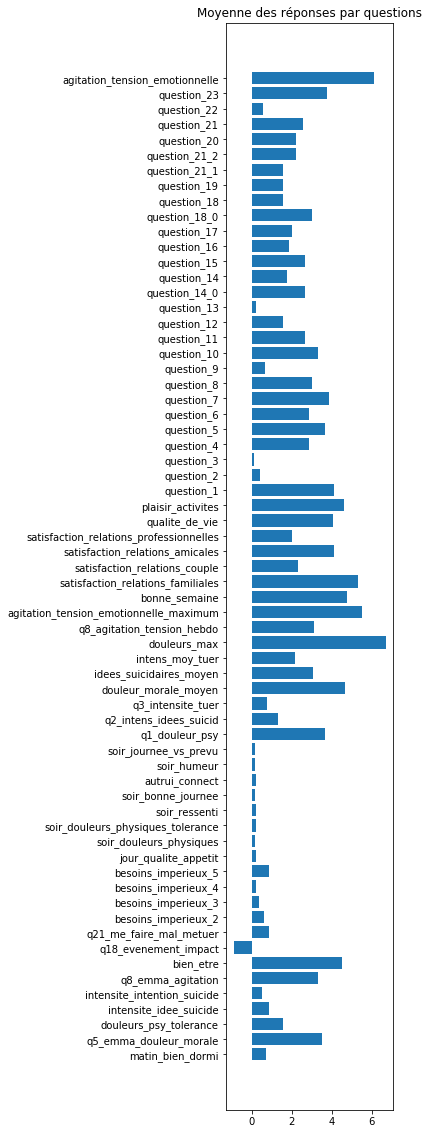

In [113]:
plt.figure(figsize=(3, 20)) 
plt.barh(*zip(*answ_mean.items()))
plt.title('Moyenne des réponses par questions')
plt.show()

In [114]:
def my_function(x):
  return  list(set(tuple(element) for element in x))

In [115]:
def retrieve_path(tree):
    path = []
    for personne in tree.keys() :
        #Personne
        for type_q in tree[personne].keys() :
            #Type de question
            if type_q not in ["Checkbox","Radio"] :
                #si question est checkbox ou radio
                for quest in tree[personne][type_q].keys() :
                    # Question
                    #print(question)
                    root = tree[personne][type_q][quest]['root']
                    path.append(root)

            else : 
                for quest in tree[personne][type_q].keys() :
                    for subelement in tree[personne][type_q][quest].keys():

                        root = tree[personne][type_q][quest][subelement]['root']
                        path.append(root)
    print(path)
    return my_function(path)

root = retrieve_path(question)      

19_evenement_impact_envie'], ['root'], ['root', 'soir_douleurs_physiques'], ['root', 'soir_douleurs_physiques'], ['root'], ['root'], ['root'], ['root'], ['root'], ['root', 'matin_bien_dormi', 'matin_mal_dormi_cause'], ['root', 'matin_bien_dormi', 'matin_mal_dormi_cause'], ['root', 'matin_bien_dormi', 'matin_mal_dormi_cause'], ['root', 'matin_bien_dormi', 'matin_mal_dormi_cause'], ['root', 'matin_bien_dormi', 'matin_mal_dormi_cause'], ['root', 'lieu'], ['root', 'lieu'], ['root', 'lieu'], ['root', 'lieu'], ['root', 'lieu'], ['root', 'lieu'], ['root', 'lieu'], ['root', 'lieu'], ['root', 'lieu'], ['root', 'lieu'], ['root', 'q10_emma_faire'], ['root', 'q10_emma_faire'], ['root', 'q10_emma_faire'], ['root', 'q10_emma_faire'], ['root', 'q10_emma_faire'], ['root', 'q10_emma_faire'], ['root', 'q10_emma_faire'], ['root', 'entourage'], ['root', 'entourage'], ['root', 'entourage'], ['root', 'entourage'], ['root', 'entourage'], ['root', 'entourage'], ['root', 'entourage'], ['root', 'entourage'], ['

In [116]:
root[5]

('root', 'soir_traitement')

In [117]:
J = []
for path in root :
    parts = path
    parent_list, current_list = J, J

    for index, part in enumerate(parts):
        for item in current_list:
            if part in item and type(item) != str:
                parent_list, current_list = current_list, item[part]
                break
        else:
            if index == len(parts) - 1:
                current_list.append(part)
            else:
                new_list = []
                current_list.append({part:new_list})
                parent_list, current_list = current_list, new_list 

In [118]:
udo = Node("root",color='red')
def recur(arbre,previous_root):
    for branche in arbre :
        if type(branche) == str :
            Node(branche,parent = previous_root,color='red')
        elif type(branche) == dict :
            for key in branche.keys() :
                tmp = Node(key,parent = previous_root,color='greed')
                recur(branche[key],tmp) 


recur(J[0]['root'],udo)

In [119]:
for pre, fill, node in RenderTree(udo):
     print("%s%s" % (pre, node.name))

root
├── ressentis_sentiments
├── entourage
├── evenement_negatif
├── evenement_relationnel
├── tentatives_suicide_famille
├── soir_traitement
├── categorie_socioprofessionnelle
├── matin_bien_dormi
│   └── matin_mal_dormi_cause
├── satisfaction_relations_professionnelles_sans_contact
├── enfants
│   └── enfants_avec_parent
├── soir_conflits
│   └── soir_conflits_type
├── question_13
├── hospitalisation
├── urgences_psychiatriques
├── emma_aide_mieux
│   └── question_14_0
│       └── question_14
│           └── question_15
│               └── question_16
│                   └── question_17
│                       └── question_18_0
│                           └── question_18
├── revenus
├── q1_douleur_psy
├── comportements_suicidaires
│   └── comportements_suicidaires_facteurs_declenchants
│       └── comportements_suicidaires_aide
├── soir_douleurs_physiques
├── section_3
│   └── question_19
│       └── question_21_1
│           └── question_21_2
│               └── question_20
│      

In [128]:
DotExporter(udo).to_dotfile('udo.dot')
Source.from_file('udo.dot')
render('dot', 'png', 'udo.dot') 

'udo.dot.png'